# slices, stacks

In [1]:
import numpy             as np
import scipy.linalg      as la
import cv2               as cv
import skimage           as si
import skimage.io        as io
import matplotlib.pyplot as plt

%matplotlib inline

## numpy indexing,  slicing, stacking

In [2]:
x = 100*np.arange(10)

x

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [3]:
x[:3]

array([  0, 100, 200])

In [4]:
x[3:-2]

array([300, 400, 500, 600, 700])

In [5]:
x[[4,4,2,5]]

array([400, 400, 200, 500])

En el siguiente ejemplo intercambiamos el orden de los canales de color.

(512, 512, 3)


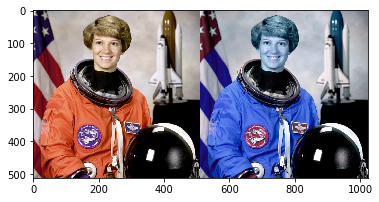

In [6]:
from skimage import data

img = data.astronaut()
print(img.shape)

plt.imshow(np.hstack([img,img[:,:,[2,1,0]]]));

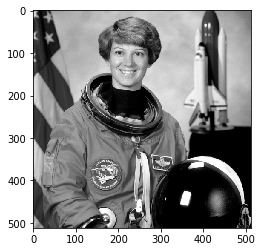

In [7]:
plt.imshow(  np.sum(img,axis=2)  ,'gray');

Podemos convertir a monocromo con una **contracción** de arrays:

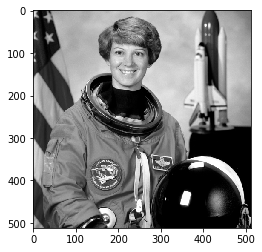

In [8]:
plt.imshow(  img @ np.array([0.3, 0.5, 0.2])  ,'gray');

In [9]:
(img @ np.array([0.3, 0.5, 0.2])).shape

(512, 512)

In [10]:
(img @ np.array([0.3, 0.5, 0.2])).dtype

dtype('float64')

In [11]:
img.dtype

dtype('uint8')

## troceado de una imagen

(450, 728, 3)
(450, 700, 3)


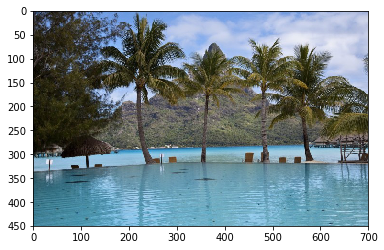

In [12]:
path = "http://robot.inf.um.es/material/va/images/"

img = io.imread(path+"palmeras.jpg")
print(img.shape)

tile = 50
r,c,_ = img.shape
rt,ct = r//tile, c//tile

# recortamos la imagen para que las piezas encajen perfectamente
img = img[:rt*tile,:ct*tile,:]
plt.imshow(img);
print(img.shape)

Descomposición en rectángulos usando `np.split`:

In [13]:
# otra posibilidad más fea
# piezas = [[rot(img[j*tile:(j+1)*tile,(k*tile):(k+1)*tile,:]) for k in range(ct)] for j in range(rt)]

piezas = [np.split(x, ct, axis=1) for x in np.split(img,rt)]
piezas = sum(piezas,[])  # concatenamos la lista de listas generadas

print(rt,ct,len(piezas))

9 14 126


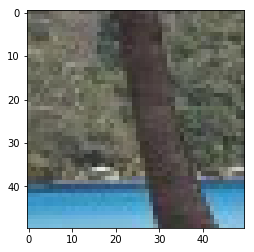

In [14]:
plt.imshow(piezas[74]);

Para recomponer las piezas definimos una función auxiliar `chunks` para agrupar los elementos de una lista.

In [15]:
# esta versión produce una lista de listas
# def chunks(l, n):
#     return [ l[i:i+n] for i in range(0, n*(len(l)//n), n) ]

# esta versión produce un generador
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]
        
list(chunks(list(range(12)),3))

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

Aplicamos `np.hstack` para pegar en horizontal cada lista de trozos, y luego `np.vstack` para juntar en vertical todas las bandas creadas.

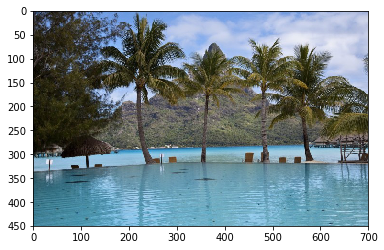

In [16]:
plt.imshow(np.vstack(map(np.hstack,chunks(piezas,ct))));

Ahora vamos a revolver los trozos. La siguiente función aplica una rotación aleatoria en una de las 4 orientaciones:

In [17]:
def rot(x):
    return np.rot90(x,np.random.randint(4))

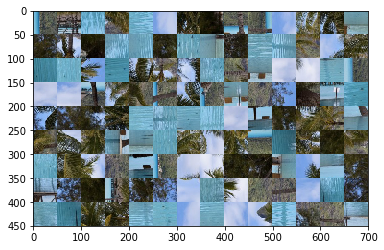

In [18]:
piezas= list(map(rot, piezas))
piezas = np.random.permutation(piezas)

puzz = np.vstack(map(np.hstack,chunks(piezas,ct)))
plt.imshow(puzz);
#io.imsave('kk.png',puzz)